#                         **7PAM2021-0105-2024-Machine Learning Tutorial**


1.   NAME: DANUSHMATHI PATHMANABAN  
2.   STUDENT ID: 23072008
3.
Github link:  https://github.com/DANUSHMATHI2002/ML_Assignment.git


**DEMONSTRATION OF MULTILAYER PRECEPTRON**

**PRE-REQUIRED LIBRARIES**

In [1]:
pip install numpy pandas tensorflow scikit-learn matplotlib

**IMPORTING THE REQUIRED LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error


**LOADING THE DATASET**

In [3]:
# Load the Wine Quality Dataset
def load_data(url):
    df = pd.read_csv(url, delimiter=';')
    return df

In [4]:
# Preprocess the data
def preprocess_data(df):
    X = df.drop('quality', axis=1).values
    y = df['quality'].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y

**MLP MODEL**

In [5]:
# Define the MLP model
def create_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

**PLOTTING THE TRAINING HISTORY**

In [6]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['mae'], label='MAE (Training)')
    plt.plot(history.history['val_mae'], label='MAE (Validation)')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.title('Model Performance Over Epochs')
    plt.grid()
    plt.show()

**MAIN FUNCTION**

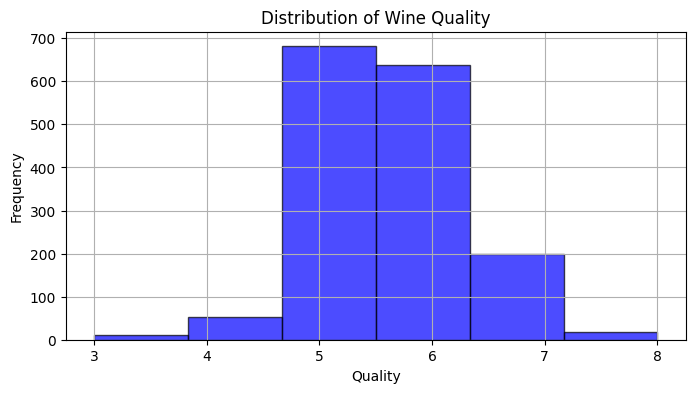

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 28.6376 - mae: 5.2341 - val_loss: 13.3985 - val_mae: 3.5092
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10.3635 - mae: 2.9598 - val_loss: 3.2969 - val_mae: 1.5265
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5166 - mae: 1.7308 - val_loss: 2.3620 - val_mae: 1.2410
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6745 - mae: 1.5369 - val_loss: 1.9735 - val_mae: 1.1274
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2584 - mae: 1.4360 - val_loss: 1.7591 - val_mae: 1.0605
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0188 - mae: 1.3908 - val_loss: 1.5508 - val_mae: 1.0000
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.6530 - mae: 1.3097 - val_loss: 1.4074 - val_mae: 0.9553
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6669 - mae: 1.2936 - val_loss: 1.3354 - val_mae: 0.9326
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss:

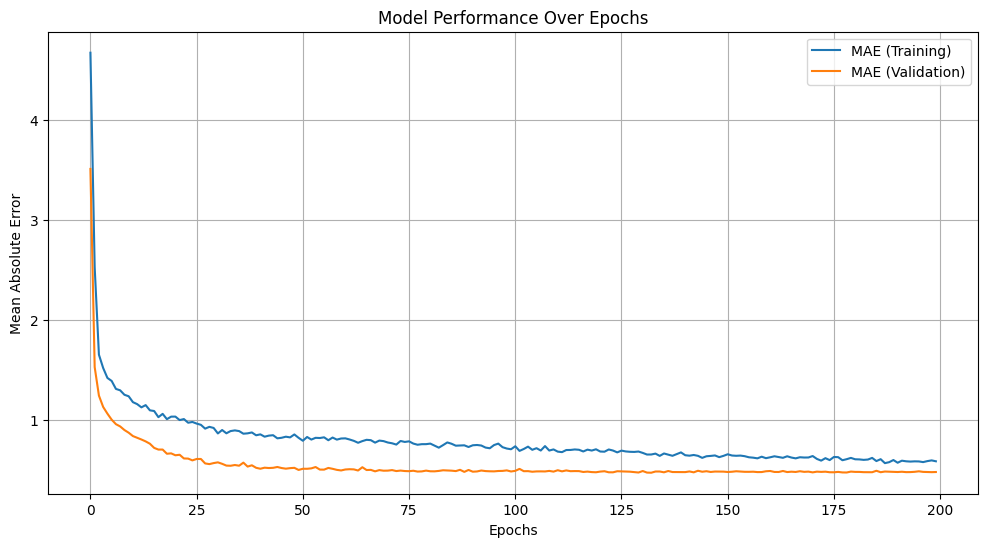

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test MAE: 0.4765, R² Score: 0.4652


In [7]:
# Main function
def main():
    dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    df = load_data(dataset_url)

    # Visualize the distribution of the target variable
    plt.figure(figsize=(8, 4))
    plt.hist(df['quality'], bins=6, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Distribution of Wine Quality')
    plt.xlabel('Quality')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

    X, y = preprocess_data(df)

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = create_model(X_train.shape[1])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=1)

    # Plot training history
    plot_history(history)

    # Evaluate model
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Test MAE: {mae:.4f}, R² Score: {r2:.4f}')

if __name__ == "__main__":
    main()


**FORWARD PROPOGATION EXAMPLE**

In [8]:

# Forward Propagation Example
# Given: X1=0.5, X2=0.7, W1=0.2, W2=0.4, b=0.1
# Activation: ReLU

def relu(x):
    return max(0, x)

# Inputs and weights
X1, X2 = 0.5, 0.7
W1, W2 = 0.2, 0.4
b = 0.1

# Compute weighted sum
Z = (W1 * X1) + (W2 * X2) + b
A = relu(Z)

print(f"Weighted sum (Z): {Z}")
print(f"Activated output (A - ReLU): {A}")


Weighted sum (Z): 0.48
Activated output (A - ReLU): 0.48


**ENHANCED MODEL PERFORMANCE EVALUATION**

Mean Absolute Error (MAE): 0.13333333333333316


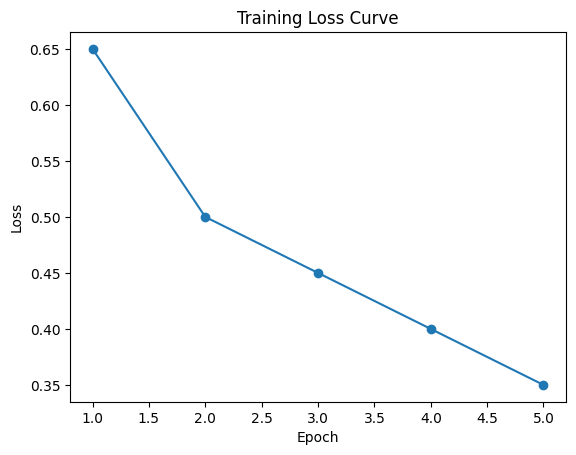

In [9]:

# Enhanced Model Performance Evaluation with MAE and Loss Plot
# Assuming 'history' is the training history of the model
# and 'y_test', 'y_pred' are actual and predicted values respectively

# Example dummy data for demonstration
y_test = np.array([5.0, 6.0, 7.0])
y_pred = np.array([5.1, 5.9, 7.2])

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# If you have training history with loss values
loss = [0.65, 0.50, 0.45, 0.40, 0.35]  # Example dummy loss per epoch

plt.plot(range(1, len(loss)+1), loss, marker='o')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
